## This is the final data set to analyze and the idea behind this stemmed from data set 2 where we realized that there is indeed a correlation between university ranking and salary
## This data set further anaylyzes the factors of what makes these schools the best (and perhaps other important unknown concepts)

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
import os
cwd = os.getcwd()
print(cwd)

C:\Users\rezwa


In [20]:
df = pd.read_csv("university ranking.csv", encoding='ISO-8859-1')

# Preview the data
df.head()

,World Rank,Institution,Location,National Rank,Quality of Education,Alumni Employment,Quality of Faculty,Research Output,Quality Publications,Influence,Citations,Score
0,1,Harvard University,USA,1,2,1,1,1,1,1,1,100.0
1,2,Stanford University,USA,2,10,3,2,10,4,3,2,96.7
2,3,Massachusetts Institute of Technology,USA,3,3,11,3,30,15,2,6,95.1
3,4,University of Cambridge,United Kingdom,1,5,19,6,12,8,6,19,94.0
4,5,University of Oxford,United Kingdom,2,9,25,10,9,5,7,4,93.2


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   World Rank            1000 non-null   int64  
 1   Institution           1000 non-null   object 
 2   Location              1000 non-null   object 
 3   National Rank         1000 non-null   int64  
 4   Quality of Education  1000 non-null   object 
 5   Alumni Employment     1000 non-null   object 
 6   Quality of Faculty    1000 non-null   object 
 7   Research Output       1000 non-null   object 
 8   Quality Publications  1000 non-null   object 
 9   Influence             1000 non-null   object 
 10  Citations             1000 non-null   object 
 11  Score                 1000 non-null   float64
dtypes: float64(1), int64(2), object(9)
memory usage: 93.9+ KB


In [22]:
df.drop(columns=['Score'], inplace=True)
df.dropna(inplace=True)
df.columns = (df.columns.str.strip().str.replace('\xa0', ' ', regex=True)
)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   World Rank            1000 non-null   int64 
 1   Institution           1000 non-null   object
 2   Location              1000 non-null   object
 3   National Rank         1000 non-null   int64 
 4   Quality of Education  1000 non-null   object
 5   Alumni Employment     1000 non-null   object
 6   Quality of Faculty    1000 non-null   object
 7   Research Output       1000 non-null   object
 8   Quality Publications  1000 non-null   object
 9   Influence             1000 non-null   object
 10  Citations             1000 non-null   object
dtypes: int64(2), object(9)
memory usage: 86.1+ KB


In [24]:
df.replace('-', np.nan, inplace=True)
df.dropna(inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 223 entries, 0 to 996
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   World Rank            223 non-null    int64 
 1   Institution           223 non-null    object
 2   Location              223 non-null    object
 3   National Rank         223 non-null    int64 
 4   Quality of Education  223 non-null    object
 5   Alumni Employment     223 non-null    object
 6   Quality of Faculty    223 non-null    object
 7   Research Output       223 non-null    object
 8   Quality Publications  223 non-null    object
 9   Influence             223 non-null    object
 10  Citations             223 non-null    object
dtypes: int64(2), object(9)
memory usage: 20.9+ KB


In [26]:
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='ignore')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 223 entries, 0 to 996
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   World Rank            223 non-null    int64 
 1   Institution           223 non-null    object
 2   Location              223 non-null    object
 3   National Rank         223 non-null    int64 
 4   Quality of Education  223 non-null    int64 
 5   Alumni Employment     223 non-null    object
 6   Quality of Faculty    223 non-null    int64 
 7   Research Output       223 non-null    object
 8   Quality Publications  223 non-null    object
 9   Influence             223 non-null    object
 10  Citations             223 non-null    object
dtypes: int64(4), object(7)
memory usage: 20.9+ KB


## The columns still need fixing some are still objects

In [29]:
cols_to_fix = ['Alumni Employment', 'Research Output', 'Quality Publications', 'Influence', 'Citations']

df[cols_to_fix] = df[cols_to_fix].apply(lambda col: pd.to_numeric(col.str.replace(',', ''), errors='coerce'))

df.dtypes

World Rank                int64
Institution              object
Location                 object
National Rank             int64
Quality of Education      int64
Alumni Employment       float64
Quality of Faculty        int64
Research Output         float64
Quality Publications    float64
Influence               float64
Citations               float64
dtype: object

## Citation = Influence of a university’s research on the global academic community.
## The productivity of the university’s research programs (Lower is better)
## Alumni Employment = Measures how successful a university’s graduates (alumni) are in securing influential or prestigious employment\

## Okay we are all set for analysis

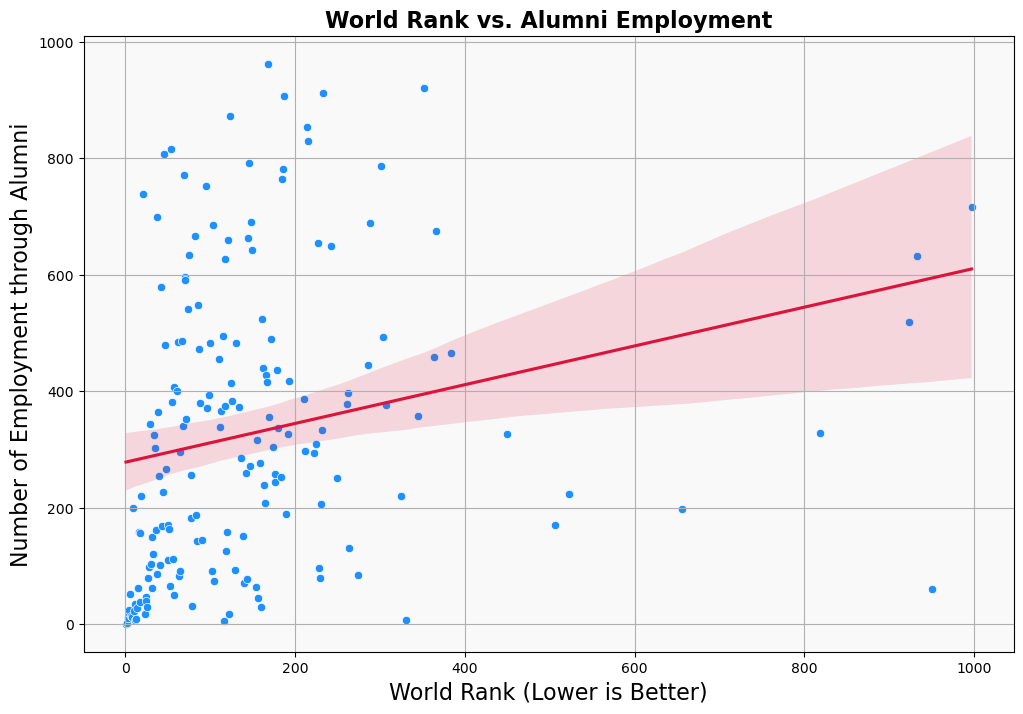

In [32]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='World Rank', y='Alumni Employment', color='dodgerblue')
sns.regplot(data=df, x='World Rank', y='Alumni Employment', scatter=False, color='crimson')
plt.title('World Rank vs. Alumni Employment',fontsize=16,fontweight='bold')
plt.xlabel('World Rank (Lower is Better)',fontsize=16)
plt.ylabel('Number of Employment through Alumni',fontsize=16)
plt.grid()
plt.gca().set_facecolor('#f9f9f9')
plt.show()

## Reasoning behind using regression line: Even when the data points are spread out, the regression line helps us to see the overall relationship. 
## It smooths out the noise to show the underlying pattern

## As World Rank increases (gets worse), Alumni Employment also worsens (higher rank = fewer successful alumni).
## Supports a hypothesis that "Top-ranked universities tend to have stronger alumni networks and better graduate outcomes", must dive deeper.

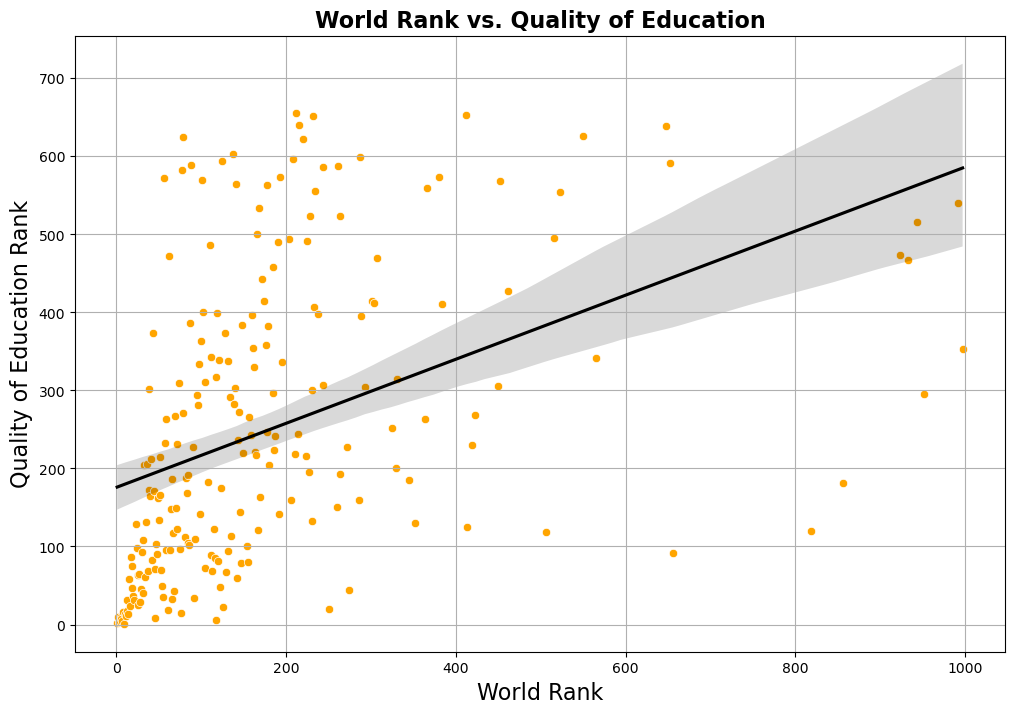

In [188]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='World Rank', y='Quality of Education', color='orange')
sns.regplot(data=df, x='World Rank', y='Quality of Education', scatter=False, color='black')
plt.title('World Rank vs. Quality of Education',fontsize=16,fontweight='bold')
plt.xlabel('World Rank',fontsize=16)
plt.ylabel('Quality of Education Rank',fontsize=16)
plt.grid()
plt.show()

## There's a lot of clustering in the lower-left, showing: Top-ranked schools (low X) often also have strong education quality (low Y)

## The spread shows that a few lower-ranked schools still manage decent education quality — but they're exceptions, not the norm

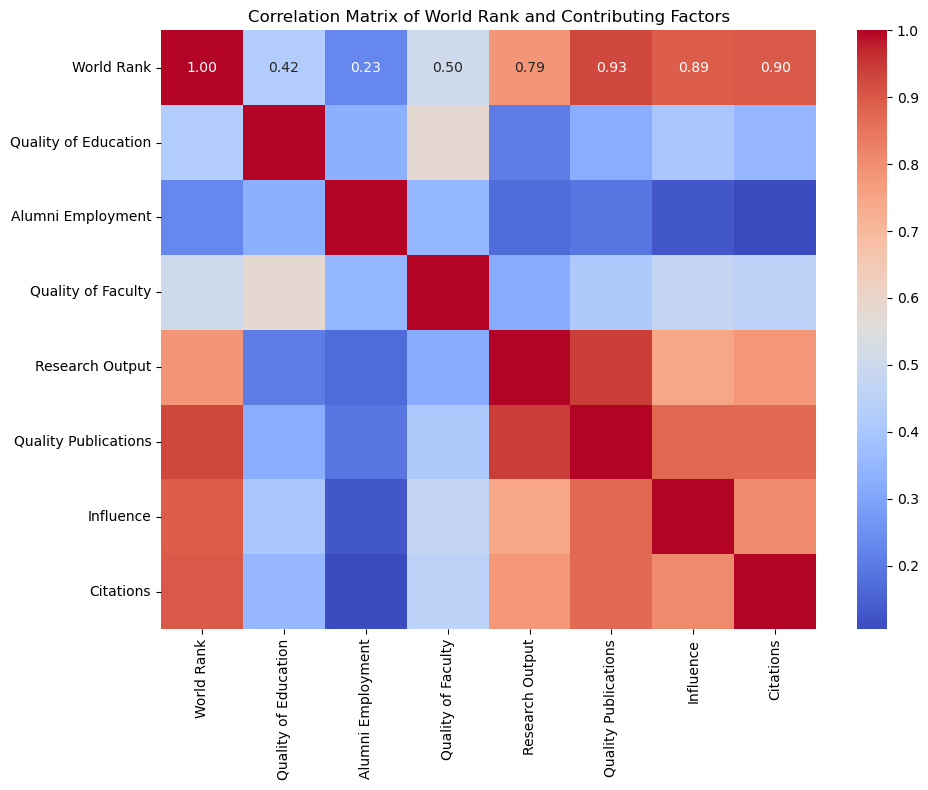

In [106]:
plt.figure(figsize=(10, 8))
corr_cols = ['World Rank', 'Quality of Education', 'Alumni Employment', 'Quality of Faculty',
             'Research Output', 'Quality Publications', 'Influence', 'Citations']
sns.heatmap(df[corr_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of World Rank and Contributing Factors')
plt.show()

## Lets look at two more factors, faculty quality and research impact

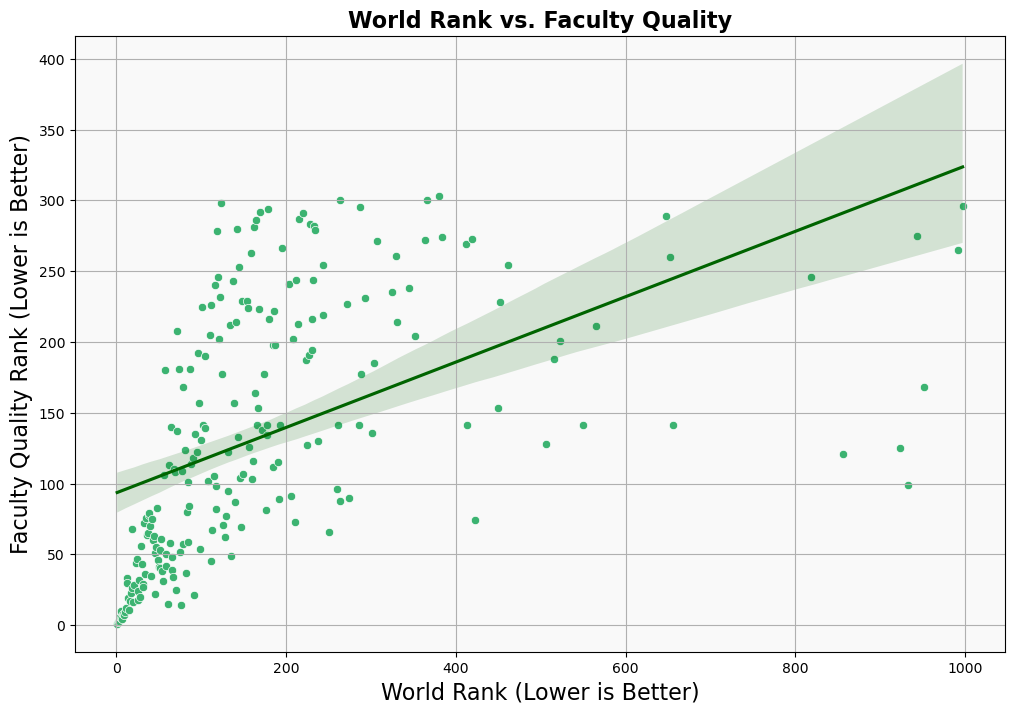

In [58]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='World Rank', y='Quality of Faculty', color='mediumseagreen')
sns.regplot(data=df, x='World Rank', y='Quality of Faculty', scatter=False, color='darkgreen')
plt.title('World Rank vs. Faculty Quality', fontsize=16, fontweight='bold')
plt.xlabel('World Rank (Lower is Better)', fontsize=16)
plt.ylabel('Faculty Quality Rank (Lower is Better)', fontsize=16)
plt.grid()
plt.gca().set_facecolor('#f9f9f9')
plt.show()

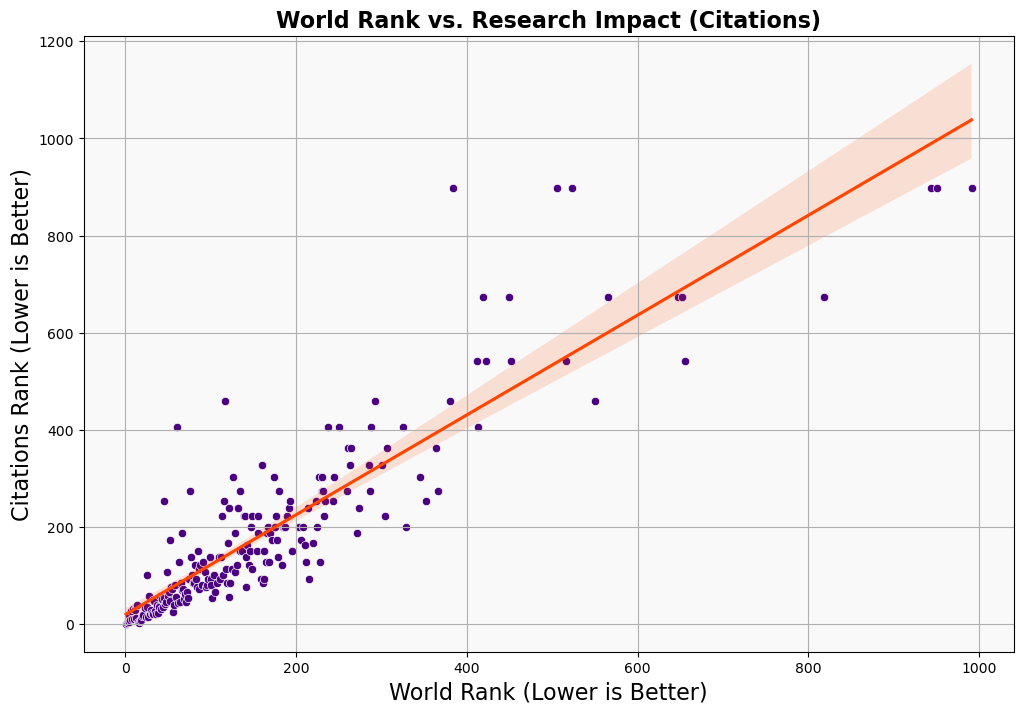

In [60]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='World Rank', y='Citations', color='indigo')
sns.regplot(data=df, x='World Rank', y='Citations', scatter=False, color='orangered')
plt.title('World Rank vs. Research Impact (Citations)', fontsize=16, fontweight='bold')
plt.xlabel('World Rank (Lower is Better)', fontsize=16)
plt.ylabel('Citations Rank (Lower is Better)', fontsize=16)
plt.grid()
plt.gca().set_facecolor('#f9f9f9')
plt.show()

## Both of these visuals are extremely important and reinforces what we thought about higher ranked univsersities
## Top-ranked universities attract and retain higher quality professors and researchers.

## There's a strong cluster in the low-rank range, which confirms that elite institutions tend to hire elite faculty.
## There’s a very clear and tight positive correlation: better-ranked schools have significantly more impactful research


C:\Users\rezwa\AppData\Local\Temp\ipykernel_16140\2678101681.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('Rank Tier')[['Quality of Faculty', 'Alumni Employment', 'Citations']].mean()


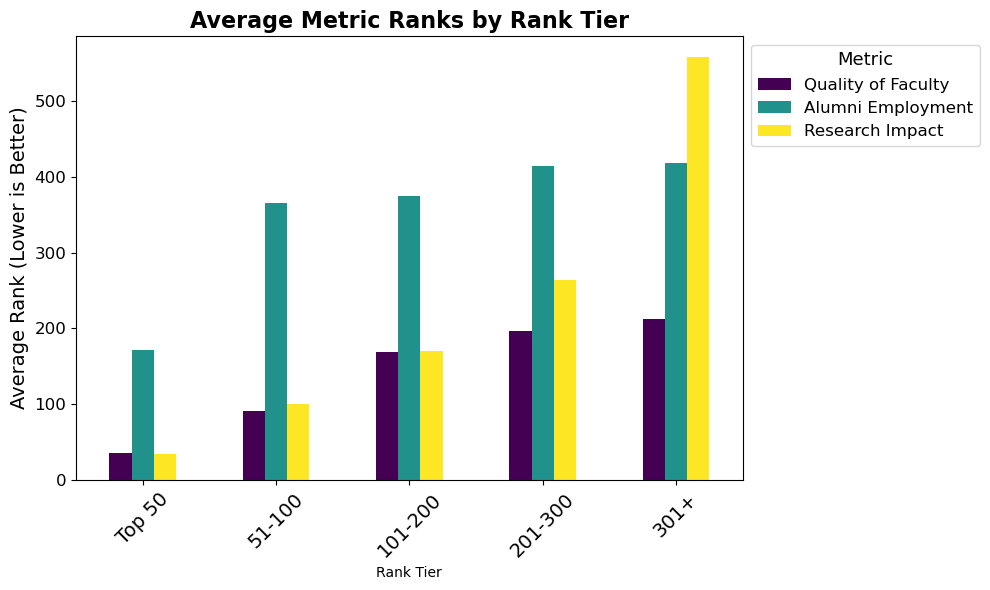

In [35]:
rank_bins = [0, 50, 100, 200, 300, 1000]
rank_labels = ['Top 50', '51-100', '101-200', '201-300', '301+']
df['Rank Tier'] = pd.cut(df['World Rank'], bins=rank_bins, labels=rank_labels)

grouped = df.groupby('Rank Tier')[['Quality of Faculty', 'Alumni Employment', 'Citations']].mean()
grouped = grouped.rename(columns={'Citations': 'Research Impact'})

ax = grouped.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Average Metric Ranks by Rank Tier', fontsize=16, fontweight='bold')
plt.ylabel('Average Rank (Lower is Better)', fontsize=14)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=12)
plt.legend(title='Metric', fontsize=12, title_fontsize=13, loc='upper left', bbox_to_anchor=(1, 1))
plt.grid()
plt.show()

## Probably not goint to use this but this is there if needed.

## FINAL SUMMARY OF VISUALS

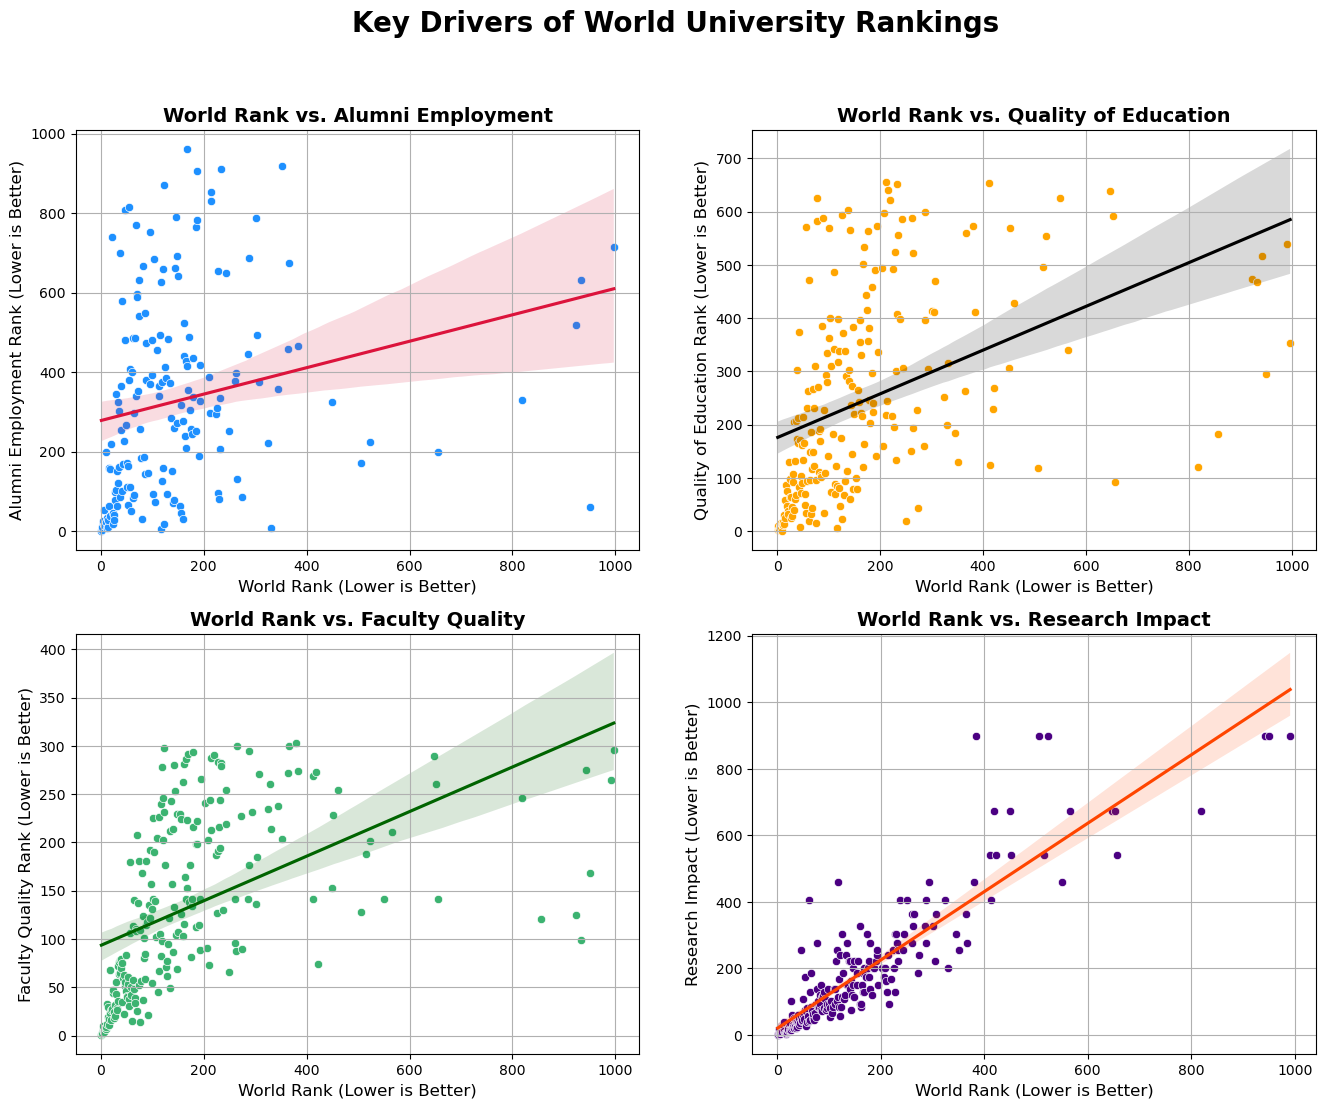

In [55]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Key Drivers of World University Rankings', fontsize=20, fontweight='bold')

sns.scatterplot(data=df, x='World Rank', y='Alumni Employment', color='dodgerblue', ax=axs[0, 0])
sns.regplot(data=df, x='World Rank', y='Alumni Employment', scatter=False, color='crimson', ax=axs[0, 0])
axs[0, 0].set_title('World Rank vs. Alumni Employment', fontsize=14, fontweight='bold')
axs[0, 0].set_xlabel('World Rank (Lower is Better)', fontsize=12)
axs[0, 0].set_ylabel('Alumni Employment Rank (Lower is Better)', fontsize=12)
axs[0, 0].grid()

sns.scatterplot(data=df, x='World Rank', y='Quality of Education', color='orange', ax=axs[0, 1])
sns.regplot(data=df, x='World Rank', y='Quality of Education', scatter=False, color='black', ax=axs[0, 1])
axs[0, 1].set_title('World Rank vs. Quality of Education', fontsize=14, fontweight='bold')
axs[0, 1].set_xlabel('World Rank (Lower is Better)', fontsize=12)
axs[0, 1].set_ylabel('Quality of Education Rank (Lower is Better)', fontsize=12)
axs[0, 1].grid()

sns.scatterplot(data=df, x='World Rank', y='Quality of Faculty', color='mediumseagreen',ax=axs[1, 0])
sns.regplot(data=df, x='World Rank', y='Quality of Faculty', scatter=False, color='darkgreen', ax=axs[1, 0])
axs[1, 0].set_title('World Rank vs. Faculty Quality', fontsize=14, fontweight='bold')
axs[1, 0].set_xlabel('World Rank (Lower is Better)', fontsize=12)
axs[1, 0].set_ylabel('Faculty Quality Rank (Lower is Better)', fontsize=12)
axs[1, 0].grid()

sns.scatterplot(data=df, x='World Rank', y='Citations', color='indigo')
sns.regplot(data=df, x='World Rank', y='Citations', scatter=False, color='orangered',ax=axs[1, 1])
axs[1, 1].set_title('World Rank vs. Research Impact', fontsize=14, fontweight='bold')
axs[1, 1].set_xlabel('World Rank (Lower is Better)', fontsize=12)
axs[1, 1].set_ylabel('Research Impact (Lower is Better)', fontsize=12)
axs[1, 1].grid()

## University rankings are influenced by academic quality, research excellence, and alumni success.
## -Alumni achievement
## -Faculty excellence
## -Educational quality
## -Research influence
## These are the core reasons why university rankings matter. They reflect more than just reputation and actually show the overall impact a university has through its education, research, and alumni success.

## We have validated our hypothesis with data from multiple angles. But we also realized earlier that rank alone doesn’t always reflect personal success or satisfaction (like meaningful work or life balance).


In [57]:
df.to_excel('CLEAN DATA SET 4.xlsx', index=False)